In [1]:
import json
import pandas as pd

# JSONファイルを読み込む（items / results / 直配列どれでもOK）
def load_items_to_df(data_path):
    with open(data_path, encoding="utf-8") as f:
        data = json.load(f)
    if isinstance(data, list):
        items = data
    elif "items" in data:
        items = data["items"]
    elif "results" in data:
        items = data["results"]
    else:
        raise ValueError("items または results 配列が見つかりません。")
    return pd.DataFrame(items)

# 実行例
SAMPLE_DATA = "../data/sample/sample_1000.json"
df = load_items_to_df(SAMPLE_DATA)
print(df.shape)
df.head(10)

(1000, 14)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,AMAZON FASHION,Shiny Rhinestone Mesh Face Covering Crystal Ma...,3.8,24,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],SATINIOR,[],"{'Brand': 'SATINIOR', 'Material': 'rhinestones...",B08YJCBMD1,None
1,AMAZON FASHION,Porsche Design Women's P'8582 P8582 C Dark Blu...,5.0,1,"[Material : PA - Metal, type : Semi-rimless, b...",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Porsche Design,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00LCAI15S,None
2,AMAZON FASHION,MORGENLICHT My Hero Academia Crop Top Hoodie W...,3.9,5,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],MORGENLICHT,[],"{'Date First Available': 'May 24, 2021'}",B08NT8V6YY,None
3,AMAZON FASHION,Dreamyn Feather Headbands Halloween Costume He...,3.6,5,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Dreamin,[],"{'Date First Available': 'October 27, 2020'}",B08GYG5L55,None
4,AMAZON FASHION,GRACE KARIN Women's Round Neck Belt Pencil Dre...,3.7,12,"[Pull On closure, Hand Wash Only]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GRACE KARIN,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B078XDG36X,None
5,AMAZON FASHION,Pole Dancing Showgirl Exotic Dancer Hot Sexy S...,4.5,3,"[Rubber sole, Heel measures approximately 2.75...",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pleaser,[],"{'Date First Available': 'October 30, 2016'}",B01FKVTLF8,None
6,AMAZON FASHION,Govc Womens Shorts Jeans Juniors Summer Casual...,4.1,37,"[Button closure, Hand Wash Only]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Govc,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07MKKMTQV,None
7,AMAZON FASHION,SweatyRocks Women's Contrast Leopard Print Sle...,4.2,4,[Pull On closure],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],SweatyRocks,[],{},B08GL9XWRR,None
8,AMAZON FASHION,Curve Muse Womens Light Lift Add 1 Cup Push Up...,2.0,1,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Curve Muse,[],{'Product Dimensions': '8.5 x 9 x 2 inches; 4....,B07P2WBGVT,None
9,AMAZON FASHION,Sailimue 316L Stainless Steel Small Half Hoops...,2.9,6,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Sailimue 4Pairs Small Half Hoops E...,sailimue,[],{'Package Dimensions': '0.1 x 0.1 x 0.1 inches...,B091CWSG36,None


In [4]:
# 上位5行の各セルの値とデータ型を1つずつ見やすく表示
for idx, row in df.head(5).iterrows():
    print(f"--- 行 index: {idx} ---")
    for col in df.columns:
        val = row[col]
        print(f"{col}: {val} (type: {type(val).__name__})")
    print()


--- 行 index: 0 ---
main_category: AMAZON FASHION (type: str)
title: Shiny Rhinestone Mesh Face Covering Crystal Masquerade Face Covering (Multicolors, 9) (type: str)
average_rating: 3.8 (type: float)
rating_number: 24 (type: int)
features: [] (type: list)
description: [] (type: list)
price: nan (type: float)
images: [{'thumb': 'https://m.media-amazon.com/images/I/61PVTixrbsL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/61PVTixrbsL._AC_.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/814FQfDMlWL._AC_UL1500_.jpg'}, {'thumb': 'https://m.media-amazon.com/images/I/51PJDnbMg7L._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/51PJDnbMg7L._AC_.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/81empwSRkgL._AC_UL1500_.jpg'}, {'thumb': 'https://m.media-amazon.com/images/I/51ioNhhQ4uL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/51ioNhhQ4uL._AC_.jpg', 'variant': 'PT02', 'hi_res': 'https://m.media-

In [2]:
# 欠損（Noneや空リスト/空辞書含む）を率で算出
def calc_missing_ratio(df):
    missing_ratio = {}
    for col in df.columns:
        vals = df[col]
        null_count = sum(
            v is None or v == "" or (isinstance(v, (list, dict)) and len(v) == 0)
            for v in vals
        )
        missing_ratio[col] = null_count / len(df)
    return pd.Series(missing_ratio).sort_values(ascending=False)

missing_ratio = calc_missing_ratio(df)
print("🔍 欠損率（0.0 = 完全に埋まっている / 1.0 = 全欠損）")
display(missing_ratio)


🔍 欠損率（0.0 = 完全に埋まっている / 1.0 = 全欠損）


categories         1.000
bought_together    1.000
videos             0.936
description        0.932
features           0.455
store              0.031
details            0.024
rating_number      0.000
main_category      0.000
title              0.000
average_rating     0.000
images             0.000
price              0.000
parent_asin        0.000
dtype: float64

In [4]:
print("🔹 データ型一覧")
display(df.dtypes)

print("🔹 数値系の基本統計量")
display(df.describe(include="number").T)

print("🔹 文字列/カテゴリ系の統計量")
display(df.describe(include="object").T)


🔹 データ型一覧


main_category       object
title               object
average_rating     float64
rating_number        int64
features            object
description         object
price              float64
images              object
videos              object
store               object
categories          object
details             object
parent_asin         object
bought_together     object
dtype: object

🔹 数値系の基本統計量


,count,mean,std,min,25%,50%,75%,max
average_rating,1000.0,3.907000,0.976773,1.00,3.40,4.00,4.70,5.00
rating_number,1000.0,14.186000,43.085424,1.00,2.00,4.00,10.00,666.00
price,73.0,46.374658,62.203625,0.01,12.99,22.03,39.99,285.99


🔹 文字列/カテゴリ系の統計量


,count,unique,top,freq
main_category,1000,1,AMAZON FASHION,1000
title,1000,1000,Shiny Rhinestone Mesh Face Covering Crystal Ma...,1
features,1000,308,[],455
description,1000,69,[],932
images,1000,988,[{'thumb': 'https://m.media-amazon.com/images/...,12
videos,1000,64,[],936
store,969,861,Nike,7
categories,1000,1,[],1000
details,1000,975,{},24
parent_asin,1000,1000,B08YJCBMD1,1


In [5]:
# カテゴリ・ブランド・ストアなどの分布
print("🛍️ main_category 分布")
display(df["main_category"].value_counts())

print("🏪 store 分布（上位10件）")
display(df["store"].value_counts().head(10))

# detailsの中のBrandがある場合
brands = df["details"].dropna().apply(lambda d: d.get("Brand") if isinstance(d, dict) else None)
print("🏷️ details.Brand 分布（上位10件）")
display(brands.value_counts().head(10))


🛍️ main_category 分布


main_category
AMAZON FASHION    1000
Name: count, dtype: int64

🏪 store 分布（上位10件）


store
Nike                7
Verdusa             6
GRACE KARIN         5
Michael Kors        5
Romwe               4
SheIn               4
Disney              4
Champion            4
La Regis Jewelry    3
COACH               3
Name: count, dtype: int64

🏷️ details.Brand 分布（上位10件）


details
SATINIOR      1
MOCHENT       1
Dearanswer    1
MantraBand    1
HANRICO       1
Microflex     1
Anoup         1
aiene         1
Aegend        1
Generic       1
Name: count, dtype: int64

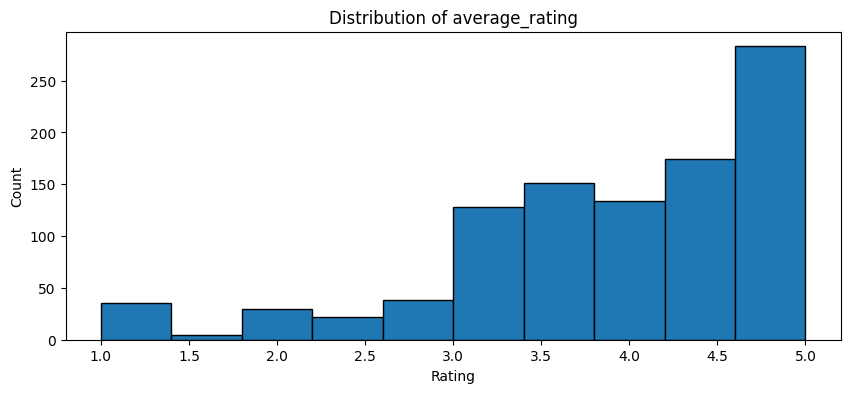

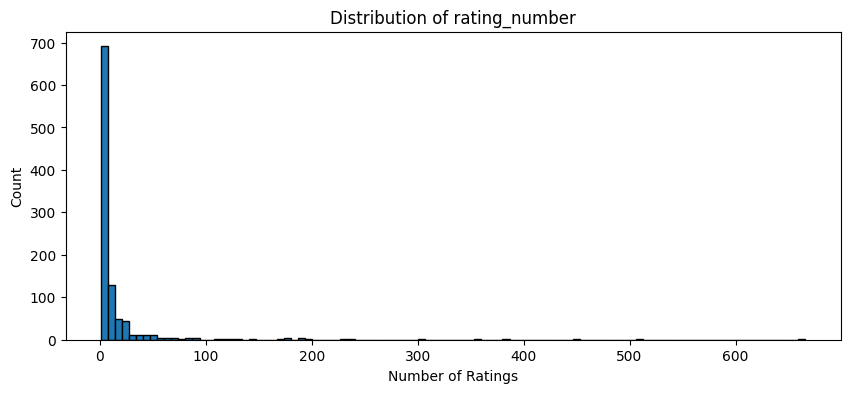

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df["average_rating"].dropna(), bins=10, edgecolor="k")
plt.title("Distribution of average_rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df["rating_number"].dropna(), bins=100, edgecolor="k")
plt.title("Distribution of rating_number")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()


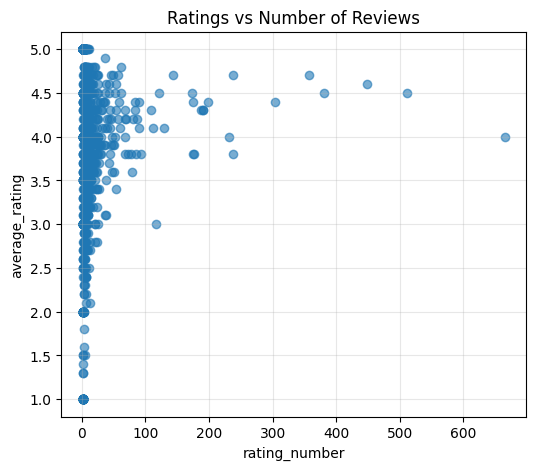

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(df["rating_number"], df["average_rating"], alpha=0.6)
plt.xlabel("rating_number")
plt.ylabel("average_rating")
plt.title("Ratings vs Number of Reviews")
plt.grid(True, alpha=0.3)
plt.show()


In [17]:
from collections import Counter

detail_keys = Counter()
for d in df["details"]:
    if isinstance(d, dict):
        detail_keys.update(d.keys())

print("📦 details 内でよく使われるキー（上位10件）")
pd.Series(detail_keys).sort_values(ascending=False).head(30)


📦 details 内でよく使われるキー（上位10件）


Date First Available               973
Package Dimensions                 663
Item model number                  452
Is Discontinued By Manufacturer    372
Product Dimensions                 184
Department                         164
Manufacturer                        81
Brand                               53
Material                            35
Age Range (Description)             28
Style                               25
Item Weight                         23
Color                               20
Size                                13
Closure Type                        11
Special Feature                      9
Batteries                            9
Item Dimensions LxWxH                8
Country of Origin                    6
Sleeve Type                          6
Shape                                6
Theme                                6
Neck Style                           6
Unit Count                           5
Item Package Quantity                5
Pattern                  

In [23]:
from collections import Counter
import pandas as pd

# features列の要素単位で頻度カウント
def feature_phrase_counts(df, column_name):
    counter = Counter()
    for f_list in df[column_name]:
        if isinstance(f_list, list):
            counter.update(f_list)
    return pd.Series(counter).sort_values(ascending=False)

phrase_freq = feature_phrase_counts(df, "features")
display(phrase_freq.head(30))


Pull On closure                  118
Hand Wash Only                   114
Machine Wash                      86
Zipper closure                    37
100% Cotton                       35
Button closure                    33
Drawstring closure                30
100% Polyester                    26
Rubber sole                       21
Tie closure                       17
Buckle closure                    14
Imported                          10
Importado                         10
Snap closure                       8
UV Protection Coating coating      8
Do Not Bleach                      6
95% Polyester, 5% Spandex          6
Ear Loop closure                   5
Dry Cloth Clean                    5
Non-Polarized                      5
Polyester,Cotton                   5
Leather                            5
Polarized                          5
Cotton Blend                       4
Fleece                             4
Polyester                          4
Elastic closure                    4
P

In [25]:
description_freq = feature_phrase_counts(df, "description")
display(description_freq.head(30))


Features:                                                                                                                                                                                                                                                                                                                                                                         3
Note:                                                                                                                                                                                                                                                                                                                                                                             3
This large size scarf not only as a traditional scarf,but also as a wrap shawl and blanket.                                                                                                                                                                     